In [1]:
from keras_resnet.cifar10_model import build_cifar_model
from keras.models import Model
from keras.optimizers import SGD
from keras.datasets import cifar10
from keras.utils import np_utils


Using TensorFlow backend.


I use the TensorFlow backend but the code should work on Theano as well. 

Let's build the 20 layer model. Here's the layer math: 

Unit number | Layer | Number of Layers
------------|-------|-------------------
1 | 3x3 convolution | 1
2 | 3 Resnet Blocks | 6 
3 | 3 Resnet Blocks | 6
4 | 3 Resnet Blocks | 6
5 | Fully-connected | 1

In [2]:
NB_CLASSES = 10
input_tensor, output_tensor = build_cifar_model(initial_nb_filters=16,
                                                nb_blocks=[1, 3, 3, 3],
                                                first_conv_shape=(3, 3),
                                                input_shape=(3, 32, 32),
                                                nb_classes=NB_CLASSES)

Standard stochastic gradient descent, starting with a learning rate of 0.1.

In [3]:
model = Model(input=input_tensor, output=output_tensor)
sgd = SGD(lr=0.1, decay=1e-4, momentum=0.9)
model.compile(optimizer=sgd, loss='categorical_crossentropy',
              metrics=['accuracy'])

Below is a picture of the model which shows the shortcut connections. The MaxPooling layers are used to downsample when the feature size decreases and the Lambda pads the output with zeros. 

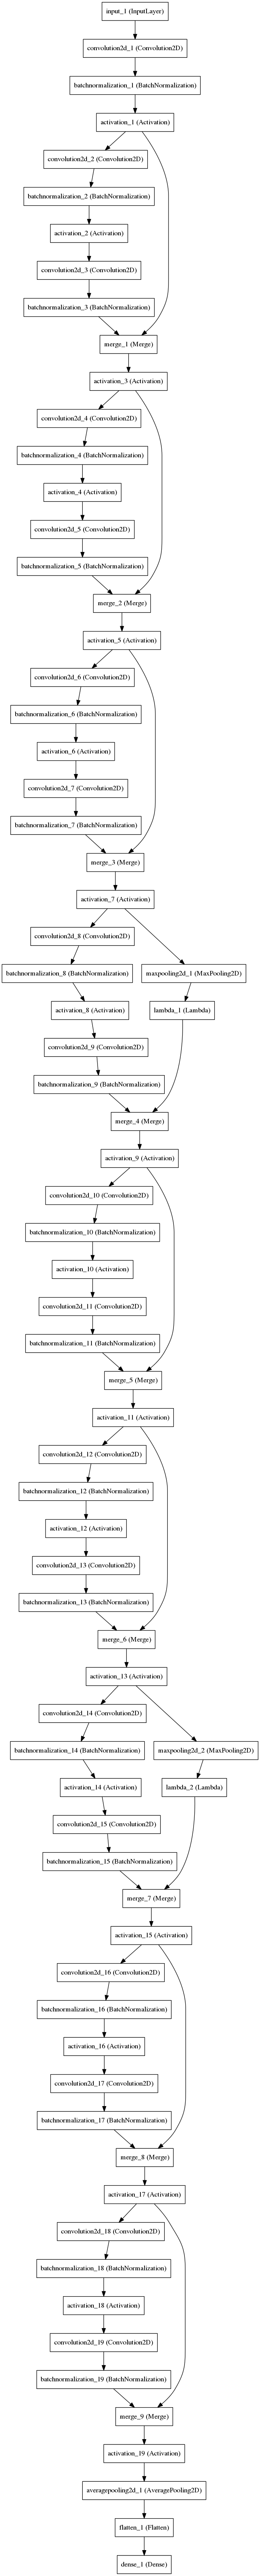

In [4]:
from IPython.display import Image
from keras.utils.visualize_util import plot

plot(model, to_file='model.png')
Image(filename='model.png', width=400)

In [5]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
print('X_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = np_utils.to_categorical(y_train, NB_CLASSES)
y_test = np_utils.to_categorical(y_test, NB_CLASSES)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

X_train shape: (50000, 3, 32, 32)
50000 train samples
10000 test samples


In [8]:
history = model.fit(X_train, y_train,
                    validation_data=(X_test, y_test),
                    batch_size=128, 
                    nb_epoch=2)

Train on 50000 samples, validate on 10000 samples
Epoch 1/2
50000/50000 [==============================] - 2564s - loss: 2.5930 - acc: 0.1538 - val_loss: 2.1203 - val_acc: 0.1920
Epoch 2/2
50000/50000 [==============================] - 2550s - loss: 2.1290 - acc: 0.2486 - val_loss: 1.9811 - val_acc: 0.2543
